In [ ]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Baca dataset
df = pd.read_csv('/content/lung_cancer.csv')

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [ ]:
print(df.dtypes)

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
#encode
num_kelamin = {
    'F' : 0,
    'M' : 1
}
print(num_kelamin)

{'F': 0, 'M': 1}


<ipython-input-10-4a99105f33e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


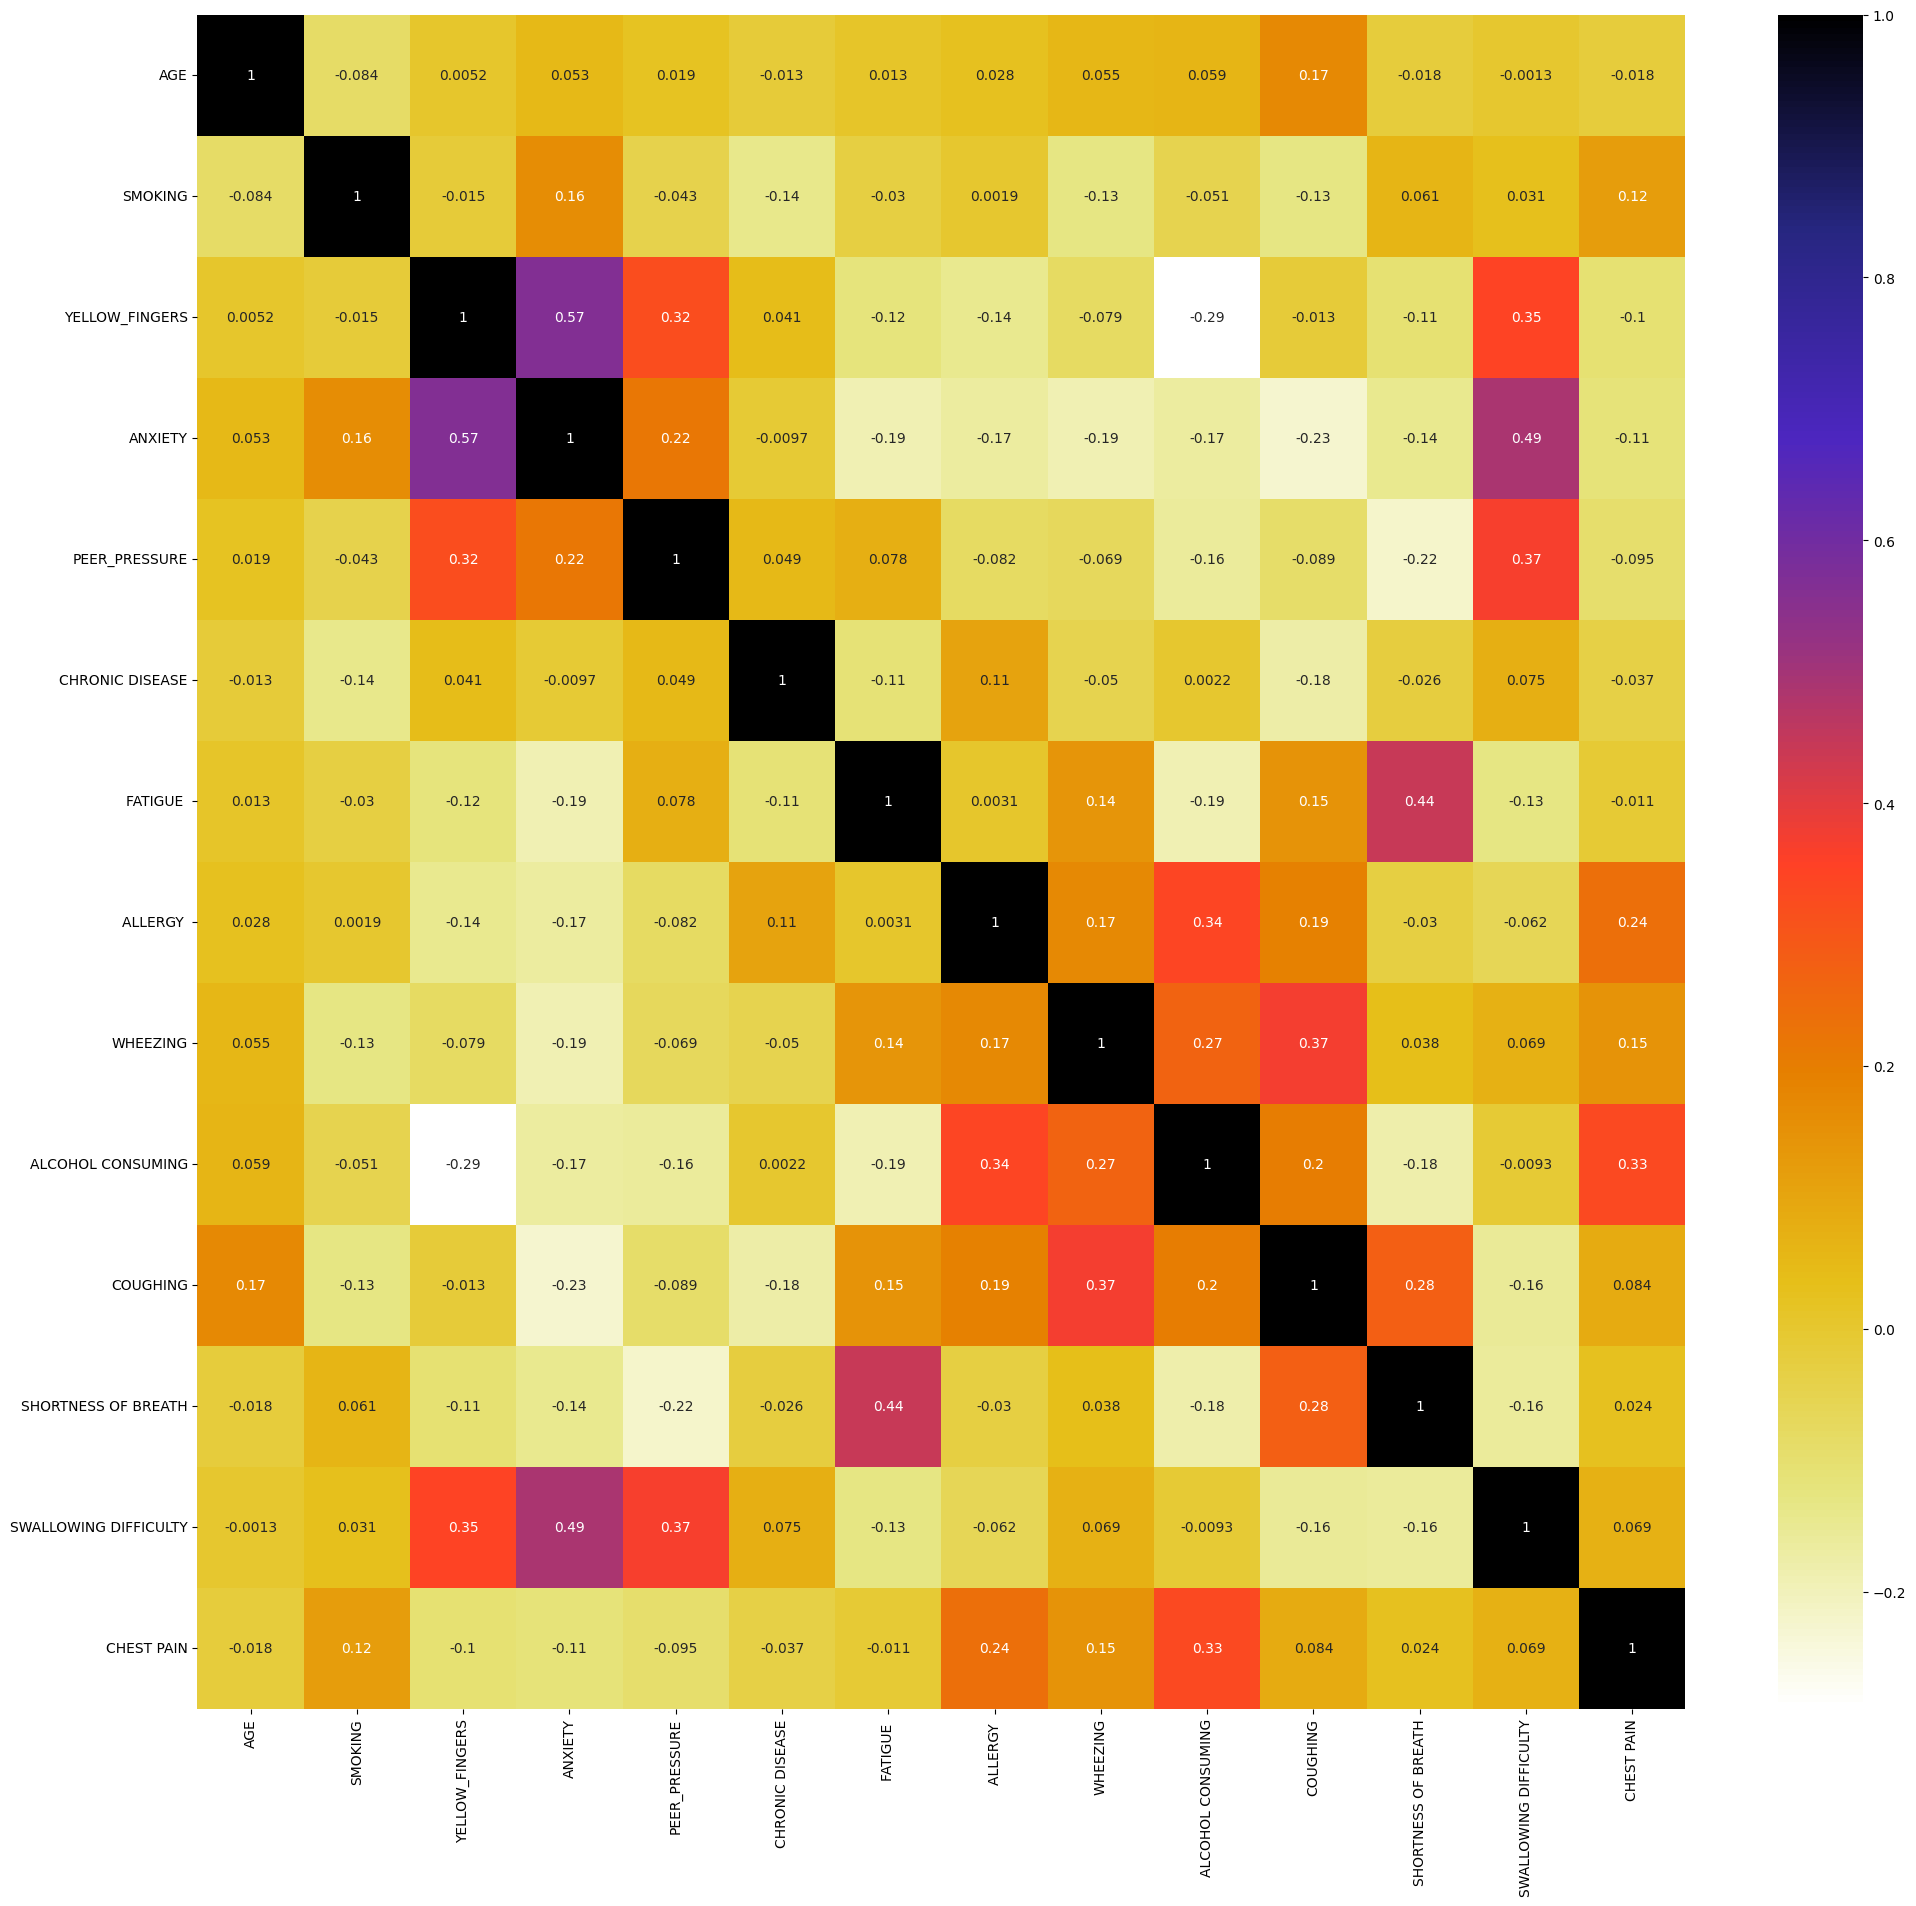

In [ ]:
cor = df.corr()
plt.figure(figsize=(24,22))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor['CHEST PAIN'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features

CHEST PAIN    1.0
Name: CHEST PAIN, dtype: float64

In [ ]:
print(df[["AGE","SMOKING"]].corr())
print('\n',df[["AGE","ANXIETY"]].corr())
print('\n',df[["AGE","ALCOHOL CONSUMING"]].corr())
print('\n',df[["SMOKING","ANXIETY"]].corr())
print('\n',df[["SMOKING","ALCOHOL CONSUMING"]].corr())
print('\n',df[["ANXIETY","ALCOHOL CONSUMING"]].corr())

              AGE   SMOKING
AGE      1.000000 -0.084475
SMOKING -0.084475  1.000000

              AGE  ANXIETY
AGE      1.00000  0.05317
ANXIETY  0.05317  1.00000

                         AGE  ALCOHOL CONSUMING
AGE                1.000000           0.058985
ALCOHOL CONSUMING  0.058985           1.000000

           SMOKING   ANXIETY
SMOKING  1.000000  0.160267
ANXIETY  0.160267  1.000000

                     SMOKING  ALCOHOL CONSUMING
SMOKING            1.000000          -0.050623
ALCOHOL CONSUMING -0.050623           1.000000

                    ANXIETY  ALCOHOL CONSUMING
ANXIETY            1.00000           -0.16575
ALCOHOL CONSUMING -0.16575            1.00000


#*Association* *Rule* Mining

menggunakan pendekatan CAR(Class Association Rule)

In [ ]:
pip install pyfpgrowth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5489 sha256=e7142f165bfe16ba283c43c7c0bd41b037875d28f1c276710195fe89f9583276
  Stored in directory: /root/.cache/pip/wheels/09/fc/dc/afff211038bfc745722d8d7e846e854e5791968b22c570a530
Successfully built pyfpgrowth


In [ ]:
import pyfpgrowth

In [ ]:
# Mengubah kolom GENDER dan LUNG_CANCER menjadi numerik untuk keperluan FP-Growth
df['GENDER'] = df['GENDER'].astype('category').cat.codes
df['LUNG_CANCER'] = df['LUNG_CANCER'].astype('category').cat.codes

In [ ]:
# Mengambil kolom yang diperlukan untuk FP-Growth
selected_columns = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                      'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                     'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']
df_fp_growth = df[selected_columns]

In [ ]:
# Mengubah dataframe menjadi list of lists (format yang dibutuhkan oleh pyfpgrowth)
transactions = df_fp_growth.values.tolist()

In [ ]:
# Menggunakan algoritma FP-Growth
patterns = pyfpgrowth.find_frequent_patterns(transactions, support_threshold=0.2)

In [ ]:
# Menggunakan aturan asosiasi untuk mendapatkan asosiasi yang kuat
rules = pyfpgrowth.generate_association_rules(patterns, confidence_threshold=0.5)

In [ ]:
# Menampilkan hasil
print("Frequent Patterns:")
print(patterns)
print("\nAssociation Rules:")
print(rules)

Frequent Patterns:
{(21,): 1, (0, 21): 2, (2, 21): 3, (1, 21): 8, (0, 2, 21): 2, (0, 1, 21): 2, (1, 2, 21): 3, (0, 1, 2, 21): 2, (79,): 1, (2, 79): 7, (1, 79): 6, (1, 2, 79): 6, (38,): 1, (0, 38): 1, (2, 38): 6, (1, 38): 6, (0, 2, 38): 1, (0, 1, 38): 1, (1, 2, 38): 6, (0, 1, 2, 38): 1, (39,): 1, (2, 39): 6, (1, 39): 7, (1, 2, 39): 6, (87,): 1, (0, 87): 2, (2, 87): 2, (1, 87): 9, (0, 2, 87): 2, (0, 1, 87): 2, (1, 2, 87): 2, (0, 1, 2, 87): 2, (46,): 1, (0, 46): 1, (2, 46): 4, (1, 46): 8, (0, 2, 46): 1, (0, 1, 46): 1, (1, 2, 46): 4, (0, 1, 2, 46): 1, (0, 48): 1, (0, 1, 48): 4, (0, 2, 48): 8, (0, 1, 2, 48): 4, (1, 1, 1, 1, 1, 48): 6, (1, 1, 1, 1, 1, 2, 48): 42, (1, 1, 1, 1, 1, 1, 48): 1, (1, 1, 1, 1, 1, 1, 2, 48): 1, (1, 1, 1, 1, 2, 48): 113, (1, 1, 1, 1, 2, 2, 48): 343, (1, 1, 1, 2, 48): 172, (1, 1, 1, 2, 2, 48): 532, (1, 1, 2, 48): 153, (1, 1, 2, 2, 48): 483, (1, 2, 48): 74, (1, 2, 2, 48): 238, (2, 48): 15, (2, 2, 48): 49, (0, 44): 1, (0, 1, 44): 5, (0, 2, 44): 7, (0, 1, 2, 44): 5, (1, 4

#General Information

In [ ]:
df.shape

(309, 16)

In [ ]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


#EDA

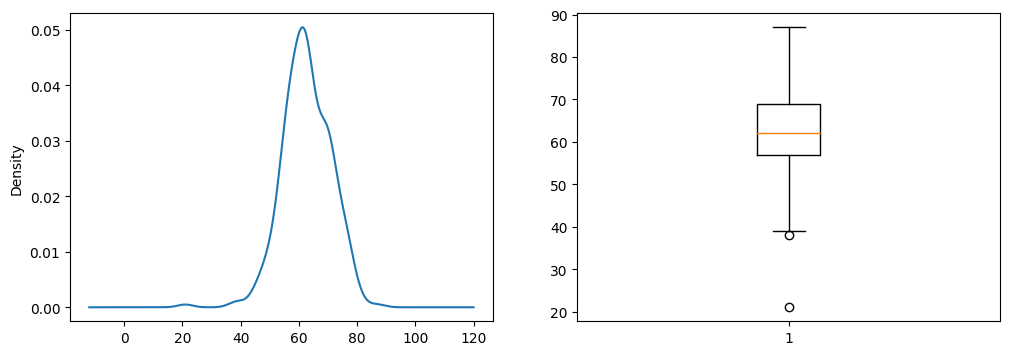

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['AGE'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['AGE'])
plt.show()

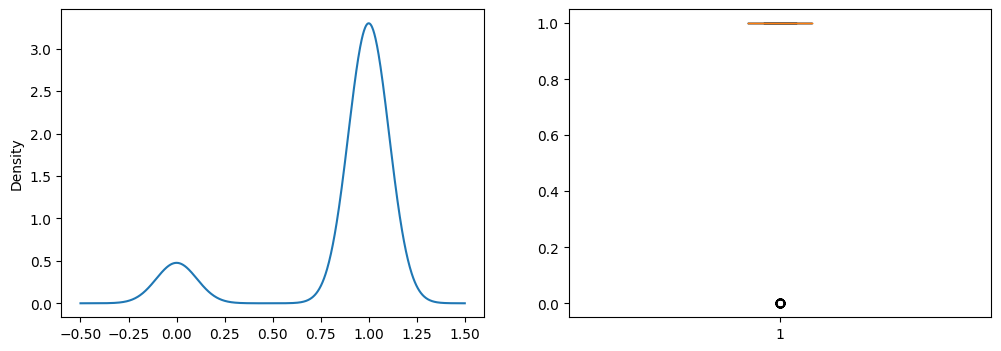

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['LUNG_CANCER'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['LUNG_CANCER'])
plt.show()

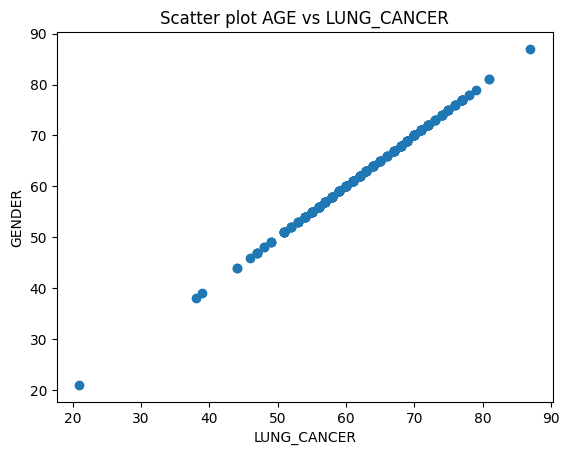

In [ ]:
plt.scatter(df['AGE'], df['AGE'])
plt.xlabel('LUNG_CANCER')
plt.ylabel('GENDER')
plt.title('Scatter plot AGE vs LUNG_CANCER')
plt.show()

In [ ]:
# Menghitung korelasi antara SMOKING dan AGE
correlation = df['LUNG_CANCER'].corr(df['AGE'])

# Output hasil korelasi
print(f"Korelasi antara LUNG_CANCER dan AGE: {correlation}")

Korelasi antara LUNG_CANCER dan AGE: 0.08946457606623369


In [ ]:
# Menghitung korelasi antara SMOKING dan AGE
correlation = df['LUNG_CANCER'].corr(df['GENDER'])

# Output hasil korelasi
print(f"Korelasi antara LUNG_CANCER dan GENDER: {correlation}")

Korelasi antara LUNG_CANCER dan GENDER: 0.06725417467830659


##Split data


In [ ]:
X = df.iloc[:, :-1].values
print(X)

[[ 1 69  1 ...  2  2  2]
 [ 1 74  2 ...  2  2  2]
 [ 0 59  1 ...  2  1  2]
 ...
 [ 1 58  2 ...  1  1  2]
 [ 1 67  2 ...  2  1  2]
 [ 1 62  1 ...  1  2  1]]


#Modeling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge  # Import Ridge from linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [ ]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Membuat objek model Ridge Regression
ridge_reg = Ridge(alpha=1.0)

In [ ]:
# Melatih model menggunakan set pelatihan yang telah discaling
ridge_reg.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
# Melakukan prediksi pada set pengujian yang telah discaling
y_pred = ridge_reg.predict(X_test_scaled)

In [ ]:
# Menghitung Mean Squared Error (MSE) sebagai metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.05225271382591448


In [ ]:
# 1. Analisis Statistik Deskriptif
# Menampilkan ringkasan statistik untuk variabel numerik
numeric_summary = df.describe()

In [ ]:
# Menampilkan informasi umum tentang dataset
general_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int8 
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [ ]:
# Menampilkan distribusi kelas variabel target
class_distribution = df['LUNG_CANCER'].value_counts()

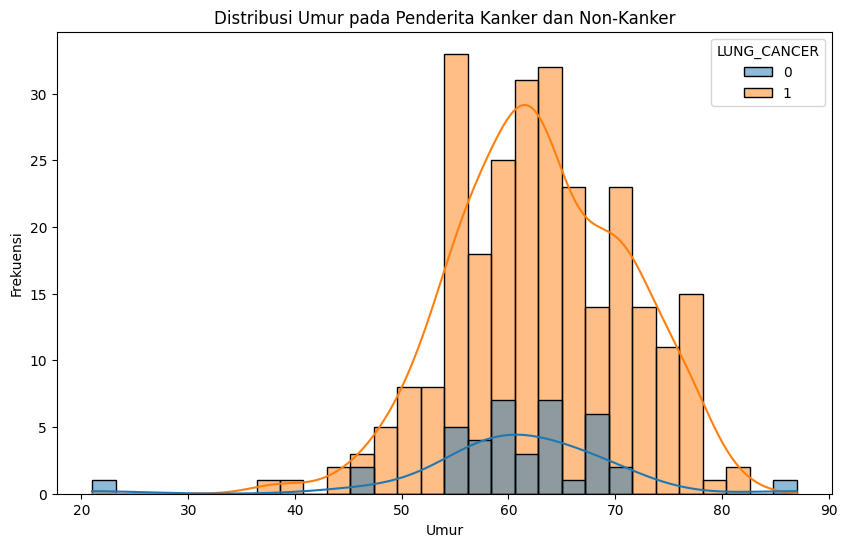

In [ ]:
# 2. Visualisasi Data
# Visualisasi distribusi umur pada penderita kanker dan non-kanker
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AGE', hue='LUNG_CANCER', bins=30, kde=True)
plt.title('Distribusi Umur pada Penderita Kanker dan Non-Kanker')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
# 3. Korelasi antar variabel
# Korelasi antara variabel numerik
correlation_matrix = df.corr()

In [ ]:
# Korelasi antara variabel kategorikal
cross_tab = pd.crosstab(df['GENDER'], df['LUNG_CANCER'])

In [ ]:
# 4. Analisis Pola
# Pola hubungan antara merokok dan risiko kanker paru-paru
smoking_cancer_pivot = df.pivot_table(index='SMOKING', columns='LUNG_CANCER', aggfunc='size', fill_value=0)

In [ ]:
# Menampilkan hasil analisis
print("1. Analisis Statistik Deskriptif:")
print(numeric_summary)
print(general_info)
print(class_distribution)

1. Analisis Statistik Deskriptif:
           GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count  309.000000  309.000000  309.000000      309.000000  309.000000   
mean     0.524272   62.673139    1.563107        1.569579    1.498382   
std      0.500221    8.210301    0.496806        0.495938    0.500808   
min      0.000000   21.000000    1.000000        1.000000    1.000000   
25%      0.000000   57.000000    1.000000        1.000000    1.000000   
50%      1.000000   62.000000    2.000000        2.000000    1.000000   
75%      1.000000   69.000000    2.000000        2.000000    2.000000   
max      1.000000   87.000000    2.000000        2.000000    2.000000   

       PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  \
count     309.000000       309.000000  309.000000  309.000000  309.000000   
mean        1.501618         1.504854    1.673139    1.556634    1.556634   
std         0.500808         0.500787    0.469827    0.497588    0.497588   


In [ ]:
print("\n2. Visualisasi Data:")
# Visualisasi telah ditampilkan di atas

print("\n3. Korelasi antar variabel:")
print("Matiks Korelasi:")
print(correlation_matrix)
print("\nTabel Kontingensi (Cross-Tab) untuk GENDER dan LUNG_CANCER:")
print(cross_tab)


2. Visualisasi Data:

3. Korelasi antar variabel:
Matiks Korelasi:
                         GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  0.021306  0.036277       -0.212959 -0.152127   
AGE                    0.021306  1.000000 -0.084475        0.005205  0.053170   
SMOKING                0.036277 -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS        -0.212959  0.005205 -0.014585        1.000000  0.565829   
ANXIETY               -0.152127  0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE         -0.275564  0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE       -0.204606 -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE               -0.083560  0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.154251  0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.141207  0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.454268  0.058985

In [ ]:
print("\n4. Analisis Pola:")
print("Pivot Table untuk Hubungan antara SMOKING dan LUNG_CANCER:")
print(smoking_cancer_pivot)


4. Analisis Pola:
Pivot Table untuk Hubungan antara SMOKING dan LUNG_CANCER:
LUNG_CANCER   0    1
SMOKING             
1            20  115
2            19  155


#Algoritma CART

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Membuat model Decision Tree (CART)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Membuat prediksi pada set pengujian
y_pred = dt_model.predict(X_test)

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

Accuracy: 0.97



In [ ]:
# Menampilkan classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



#Hierarchical Clustering

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Menggunakan metode linkage untuk menghitung jarak antar data
linkage_matrix = linkage(X_scaled, method='ward')

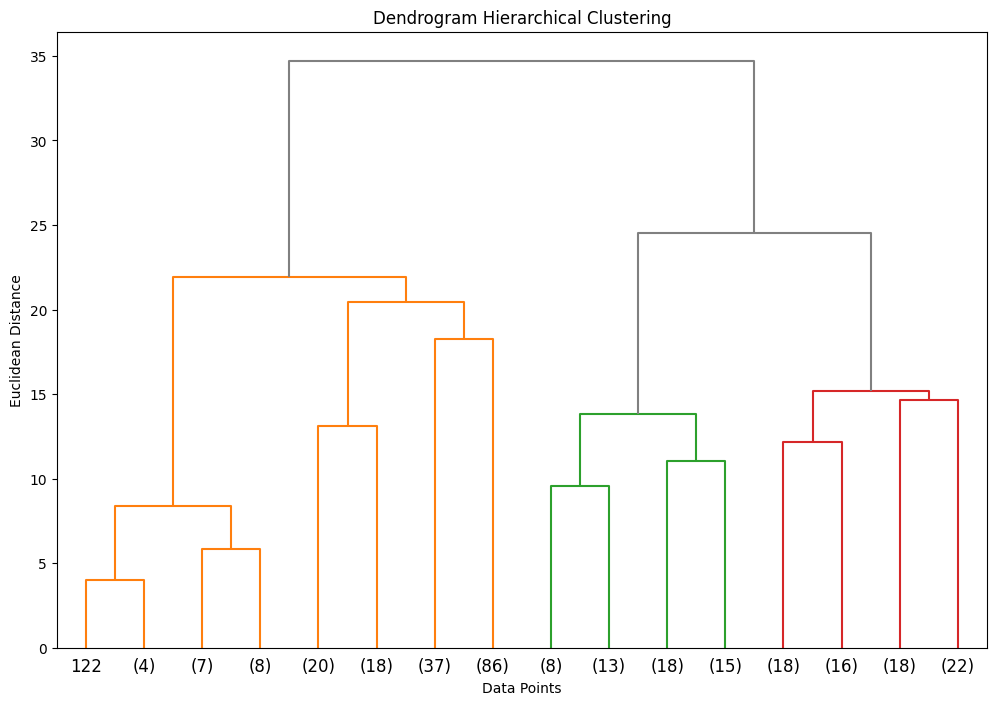

In [ ]:
# Membuat dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=3, color_threshold=None, above_threshold_color='grey')
plt.title('Dendrogram Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
# Menggunakan algoritma Agglomerative Clustering
num_clusters = 4
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
y_pred = agg_cluster.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# Menampilkan hasil pengelompokan
result_df = pd.DataFrame({'Cluster': y_pred, 'LUNG_CANCER': y})
print(result_df)

     Cluster  LUNG_CANCER
0          0            1
1          0            1
2          0            0
3          1            0
4          0            0
..       ...          ...
304        0            1
305        0            1
306        0            1
307        0            1
308        0            1

[309 rows x 2 columns]


In [ ]:
# Menyaring data yang bukan noise
filtered_data = df[y_pred != -1]

In [ ]:
# Menampilkan hasil pengelompokan
result_df = pd.DataFrame({'Cluster': y_pred, 'LUNG_CANCER': y})
print(result_df)

     Cluster  LUNG_CANCER
0          0            1
1          0            1
2          0            0
3          1            0
4          0            0
..       ...          ...
304        0            1
305        0            1
306        0            1
307        0            1
308        0            1

[309 rows x 2 columns]


In [ ]:
df_map = pd.DataFrame(df)

df_map.loc[df_map['GENDER'] == 2].head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER


In [ ]:
import pandas as pd

# Misalkan df adalah DataFrame Anda
df_map = pd.DataFrame(df)

# Menampilkan semua  isi kolom menggunakan df_map.loc
print(df_map.loc[:, :].head())

   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2               

#Clustering Evaluation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

In [ ]:
# Evaluasi dengan Silhouette Score
silhouette_hierarchical = silhouette_score(X_scaled, y_pred)

In [ ]:
# Evaluasi dengan Davies-Bouldin Index
davies_bouldin_hierarchical = davies_bouldin_score(X_scaled, y_pred)

In [ ]:
print("Silhouette Score (Hierarchical Clustering):", silhouette_hierarchical)

Silhouette Score (Hierarchical Clustering): 0.1255417839935215


In [ ]:
print("Davies-Bouldin Index (Hierarchical Clustering):", davies_bouldin_hierarchical)

Davies-Bouldin Index (Hierarchical Clustering): 1.9788570213024317


In [ ]:
# Evaluasi dengan Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score
calinski_hierarchical = calinski_harabasz_score(X_scaled, y_pred)

print("Calinski-Harabasz Index (Hierarchical Clustering):", calinski_hierarchical)

Calinski-Harabasz Index (Hierarchical Clustering): 33.28082774288517


In [ ]:
# Ground Truth (contoh, dapat diganti dengan label sesuai dengan dataset Anda)
ground_truth_labels = df['LUNG_CANCER']

In [ ]:
# Evaluasi dengan Rand Score
from sklearn.metrics import adjusted_rand_score
rand_score_hierarchical = adjusted_rand_score(ground_truth_labels, y_pred)

print("Adjusted Rand Score (Hierarchical Clustering):", rand_score_hierarchical)

Adjusted Rand Score (Hierarchical Clustering): 0.07270677772119524
